<a href="https://colab.research.google.com/github/EumGitae/Machine-Learning/blob/main/13week_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision tree 구현



1번 : 강의자료 예제 구현

    - 뿌리node에서의 gain값을 구하는 프로세스까지만 numpy 함수로 구현

    - 전체를 scikit learn함수로 실행해서 plotting

In [178]:
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [179]:
# 맑음: 0, 흐림: 1, 비: 2
# 고: 2, 중: 1, 저: 0
# 고: 1, 정상: 0
# 약: 0, 강: 1
# N: 0, Y: 1

data = np.array([[0, 2, 1, 0, 0],
                [0, 2, 1, 1, 0],
                [1, 2, 1, 0, 1],
                [2, 1, 1, 0, 1],
                [2, 0, 0, 0, 1],
                [2, 0, 0, 1, 0],
                [1, 0, 0, 1, 1],
                [0, 1, 1, 0, 0],
                [0, 0, 0, 0, 1],
                [2, 1, 0, 0, 1],
                [0, 1, 0, 1, 1],
                [1, 1, 1, 1, 1],
                [1, 2, 0, 0, 1],
                [2, 1, 1, 1, 0]])
X = data[:,0:4]
y = data[:,4]

추가 실습: 각각의 피처들마다 gain값을 구하기 (중간노드)

In [180]:
feature_names = ['기상예보(Weather forecast)', '온도(Temperature)', '습도(Humidity)', '바람(Wind)']

def entropy(y):
    values, counts = np.unique(y, return_counts = True)
    p = counts / counts.sum()
    return -np.sum(p * np.log2(p))

def root_node(X, y):
    total_entropy = entropy(y)
    print(f'전체 데이터 엔트로피 : {total_entropy:.4f}\n')
    info_gains = []

    for feature_idx in range(X.shape[1]):
        feature_values = np.unique(X[:, feature_idx])
        feature_entropy = 0
        for value in feature_values:
            idx = X[:, feature_idx] == value
            subset_y = y[idx]
            weight = len(subset_y) / len(y)
            subset_entropy = entropy(subset_y)
            feature_entropy += weight * entropy(subset_y)
        info_gain = total_entropy - feature_entropy
        info_gains.append(info_gain)
        print(f"{feature_names[feature_idx]}의 정보 이득: {info_gain:.4f}")

    root_idx = np.argmax(info_gains)
    print(f"\n뿌리 노드: {feature_names[root_idx]}")
    return root_idx

def middle_node(X, y, sub_feature_idx):
    root_values = np.unique(X[:, sub_feature_idx])

    for val in root_values:
        idx = X[:, sub_feature_idx] == val
        sub_X = X[idx]
        sub_y = y[idx]

        del_X = np.delete(sub_X, sub_feature_idx, axis = 1) # root로 사용한 피처 제거
        del_names = feature_names[:sub_feature_idx] + feature_names[sub_feature_idx+1:]

        print(f"\n{feature_names[sub_feature_idx]} = {val}인 중간 노드 정보이득:")
        total_entropy = entropy(sub_y)
        for i in range(del_X.shape[1]):
            feature_values = np.unique(del_X[:, i])
            feature_entropy = 0
            for j in feature_values:
                fidx = del_X[:, i] == j
                subset_y = sub_y[fidx]
                weight = len(subset_y) / len(sub_y)
                feature_entropy += weight * entropy(subset_y)
            info_gain = total_entropy - feature_entropy
            info_gain = 0.0 if abs(info_gain) < 1e-6 else info_gain # 이걸 안쓰면 -0.0000이 나와서 지피티 참조
            print(f"{del_names[i]}의 정보 이득: {info_gain:.4f}")

root_idx = root_node(X, y)
middle_node(X, y, root_idx)

전체 데이터 엔트로피 : 0.9403

기상예보(Weather forecast)의 정보 이득: 0.2467
온도(Temperature)의 정보 이득: 0.0292
습도(Humidity)의 정보 이득: 0.1518
바람(Wind)의 정보 이득: 0.0481

뿌리 노드: 기상예보(Weather forecast)

기상예보(Weather forecast) = 0인 중간 노드 정보이득:
온도(Temperature)의 정보 이득: 0.5710
습도(Humidity)의 정보 이득: 0.9710
바람(Wind)의 정보 이득: 0.0200

기상예보(Weather forecast) = 1인 중간 노드 정보이득:
온도(Temperature)의 정보 이득: 0.0000
습도(Humidity)의 정보 이득: 0.0000
바람(Wind)의 정보 이득: 0.0000

기상예보(Weather forecast) = 2인 중간 노드 정보이득:
온도(Temperature)의 정보 이득: 0.0200
습도(Humidity)의 정보 이득: 0.0200
바람(Wind)의 정보 이득: 0.9710


scikit-learn의 DecisionTreeClassifier는 자동으로 정보 이득이 가장 높은 피처를 뿌리 노드로 선택하고, 이진분류를 사용하기 때문에 subset이 0,1,2 세 개인 Weather forecast는 모듈자체에서 후순위로 밀려 그 다음으로 정보이득이 높은 Humidity가 뿌리노드가 됐다. 상위 모듈을 사용한다면 위에 구한 정보이득을 바탕으로 기상예보가 뿌리노드로 오는게 정상일 것이다.

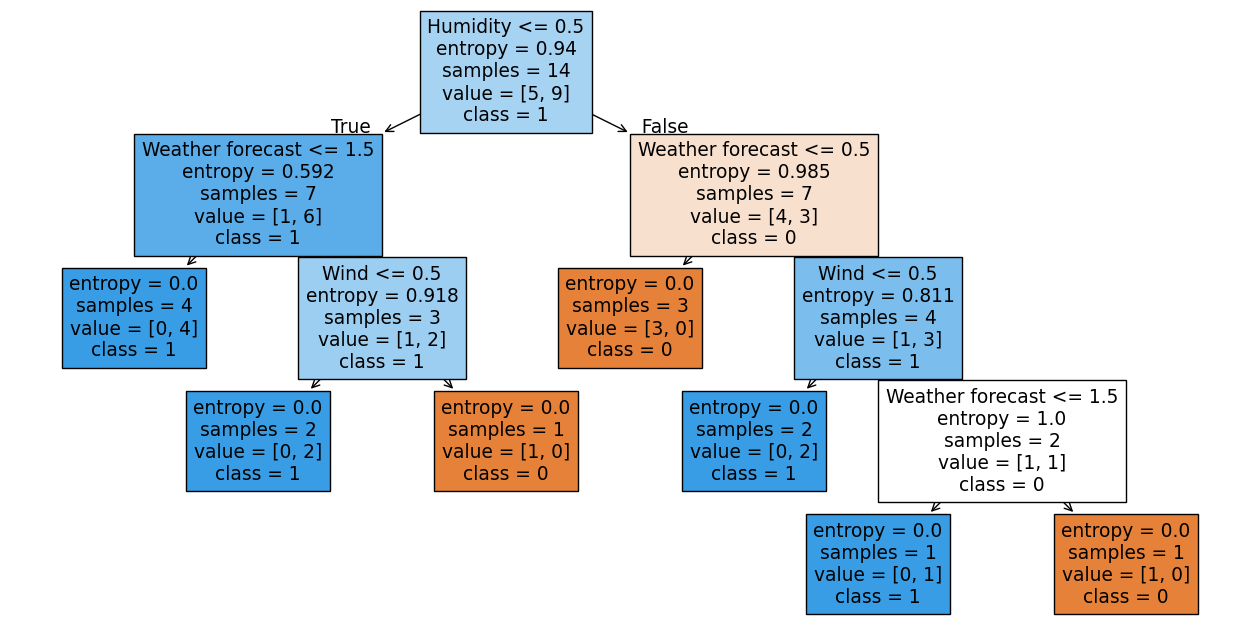

In [181]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 5)
clf.fit(X, y)

plt.figure(figsize=(16,8))
tree.plot_tree(clf, feature_names=['Weather forecast', 'Temperature', 'Humidity', 'Wind'], class_names=['0', '1'], filled=True)
plt.show()

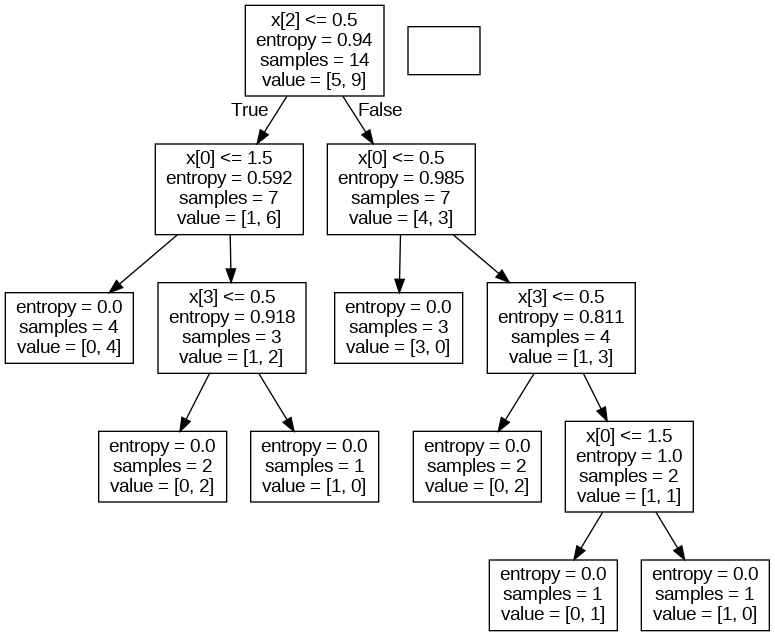

In [182]:
# Decision Tree for binary classifier
dot_data = export_graphviz(clf)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

2번 :

    - scikit learn으로 실행해서 plotting

    - drug200.exe data 처리
    

In [183]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [184]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/drug200.csv")

In [185]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [187]:
# 3개의 입력피처와 1개의 타깃변수들을 전처리 및 plotting

df['Sex'] = df['Sex'].replace({'F':2,'M':1})
df['BP'] = df['BP'].replace({'HIGH':2,'LOW':1,'NORMAL':0})
df['Cholesterol'] = df['Cholesterol'].replace({'HIGH':2,'LOW':1,'NORMAL':0})
df['Drug'] = df['Drug'].replace({'drugA':1,'drugB':2,'drugC':3,'drugX':4,'drugY':5})
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,2,2,2,25.355,5
1,47,1,1,2,13.093,3
2,47,1,1,2,10.114,3
3,28,2,0,2,7.798,4
4,61,2,1,2,18.043,5


In [188]:
X = df[['Sex', 'BP', 'Cholesterol']]
y = df['Drug']

In [189]:
def entropy(y):
    values, counts = np.unique(y, return_counts = True)
    p = counts / counts.sum()
    return -np.sum(p * np.log2(p))

total_entropy = entropy(y)
print(f'전체 데이터 엔트로피 : {total_entropy:.4f}')

for feature_idx in range(X.shape[1]):
    feature_values = np.unique(X.iloc[:, feature_idx])
    feature_entropy = 0
    for value in feature_values:
        idx = X.iloc[:, feature_idx] == value
        subset_y = y[idx]
        weight = len(subset_y) / len(y)
        subset_entropy = entropy(subset_y)
        feature_entropy += weight * subset_entropy
    info_gain = total_entropy - feature_entropy
    print(f'Feature {feature_idx}의 정보 이득 : {info_gain:.4f}')

전체 데이터 엔트로피 : 1.9688
Feature 0의 정보 이득 : 0.0077
Feature 1의 정보 이득 : 0.6201
Feature 2의 정보 이득 : 0.0931


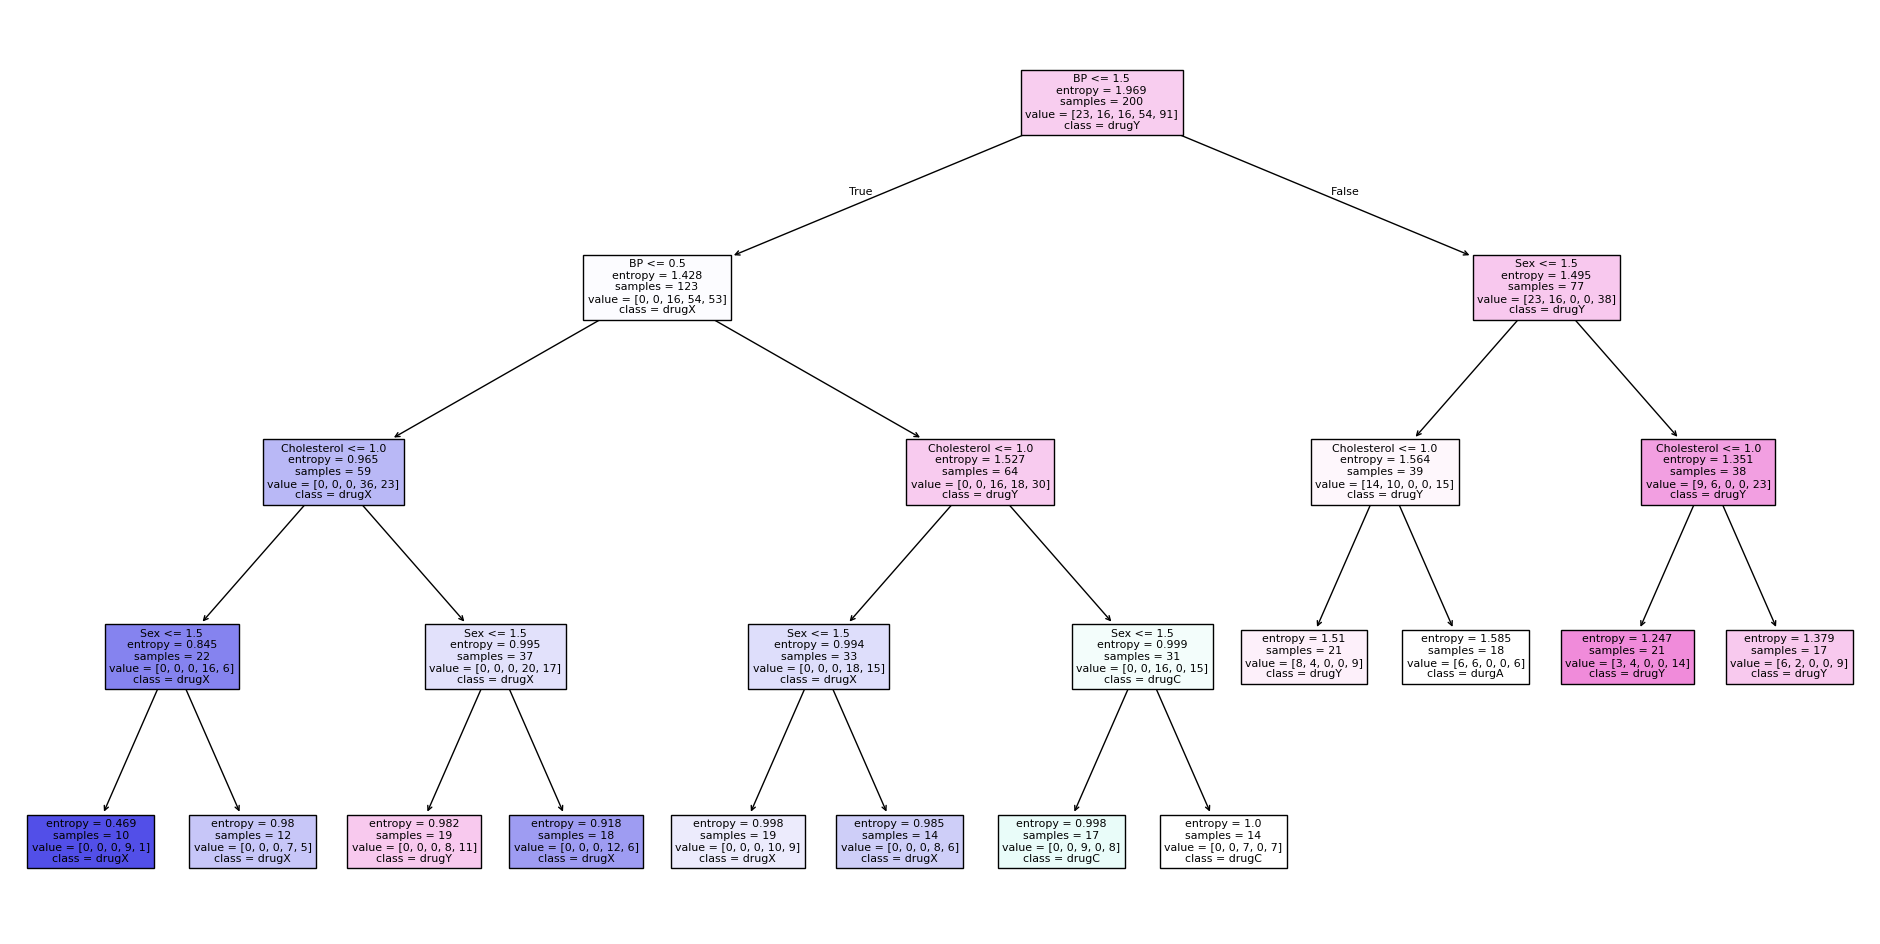

In [190]:
# 3개의 피처와 1개의 타깃변수들로 트리생성

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
clf.fit(X, y)
plt.figure(figsize=(24, 12))
tree.plot_tree(clf, feature_names=['Sex', 'BP', 'Cholesterol'], class_names=['durgA','drugB', 'drugC', 'drugX', 'drugY'], filled=True)
plt.show()